# Classification Methods:
- SVM
- KNN
- Losgistic
- DT -> RF
- NB
- NN

Pre-processing:
1. Data Cleaning
2. Data Integration
3. Data Transformation

## Libraries

In [88]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Data Preparation

In [89]:
penguins_data = pd.read_csv('penguins_size.csv')
penguins_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [90]:
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_data[numerical_columns] = penguins_data[numerical_columns].fillna(penguins_data[numerical_columns].mean())

penguins_data.dropna(inplace=True)

columns_to_normalize = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
penguins_data[columns_to_normalize] = scaler.fit_transform(penguins_data[columns_to_normalize])

penguins_data = pd.get_dummies(penguins_data, columns=['species', 'island'])

penguins_data['sex'] = penguins_data['sex'].map({'MALE': 0, 'FEMALE': 1}).fillna(0)

X = penguins_data.drop(columns=['sex'])
Y = penguins_data['sex']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [92]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
X_train.head()

267 267
67 67


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
230,-0.567520,-1.761093,0.927425,0.548689,0,0,1,1,0,0
84,-1.227787,0.325462,-0.715295,-1.068970,1,0,0,0,1,0
303,1.101488,-0.641478,1.641651,1.419736,0,0,1,1,0,0
22,-1.484557,1.037945,-0.858141,-0.509011,1,0,0,1,0,0
29,-0.640883,0.885270,-1.500944,-0.322358,1,0,0,1,0,0


## SVM

In [93]:
svm_classifier = SVC(kernel='linear')

svm_start_train_time = time.time()
svm_classifier.fit(X_train, y_train)
svm_end_train_time = time.time()
svm_train_time = svm_end_train_time - svm_start_train_time

svm_start_pred_time = time.time()
y_pred = svm_classifier.predict(X_test)
svm_end_pred_time = time.time()
svm_pred_time = svm_end_pred_time - svm_start_pred_time


svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)
print("Training Time:", svm_train_time, "seconds")
print("Prediction Time:", svm_pred_time, "seconds")

Accuracy: 0.8955223880597015
Training Time: 0.0075836181640625 seconds
Prediction Time: 0.0 seconds


## KNN

In [94]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_start_train_time = time.time()
knn_classifier.fit(X_train, y_train)
knn_end_train_time = time.time()
knn_train_time = knn_end_train_time - knn_start_train_time


knn_start_pred_time = time.time()
y_pred = knn_classifier.predict(X_test)
knn_end_pred_time = time.time()
knn_pred_time = knn_end_pred_time - knn_start_pred_time

print(knn_end_train_time, knn_start_train_time)

knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)
print("Training Time:", knn_train_time, "seconds")
print("Prediction Time:", knn_pred_time, "seconds")

1709468201.512091 1709468201.512091
Accuracy: 0.8955223880597015
Training Time: 0.0 seconds
Prediction Time: 0.00856161117553711 seconds


## RF

In [95]:
random_forest_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

rf_start_train_time = time.time()
random_forest_classifier.fit(X_train, y_train)
rf_end_train_time = time.time()
rf_train_time = rf_end_train_time - rf_start_train_time

rf_start_pred_time = time.time()
y_pred = random_forest_classifier.predict(X_test)
rf_end_pred_time = time.time()
rf_pred_time = rf_end_pred_time - rf_start_pred_time

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)
print("Training Time:", rf_train_time, "seconds")
print("Prediction Time:", rf_pred_time, "seconds")

Accuracy: 0.8208955223880597
Training Time: 0.022591352462768555 seconds
Prediction Time: 0.0 seconds


## NB

In [96]:
naive_bayes_classifier = GaussianNB()

nb_start_train_time = time.time()
naive_bayes_classifier.fit(X_train, y_train)
nb_end_train_time = time.time()
nb_train_time = nb_end_train_time - nb_start_train_time

nb_start_pred_time = time.time()
y_pred = naive_bayes_classifier.predict(X_test)
nb_end_pred_time = time.time()
nb_pred_time = nb_end_pred_time - nb_start_pred_time

nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)
print("Training Time:", nb_train_time, "seconds")
print("Prediction Time:", nb_pred_time, "seconds")


Accuracy: 0.6865671641791045
Training Time: 0.0 seconds
Prediction Time: 0.0 seconds


## Visualization

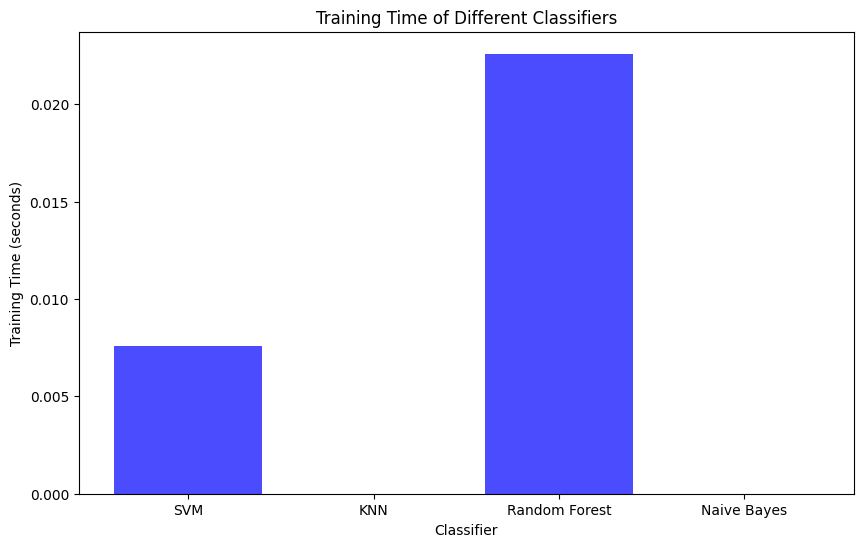

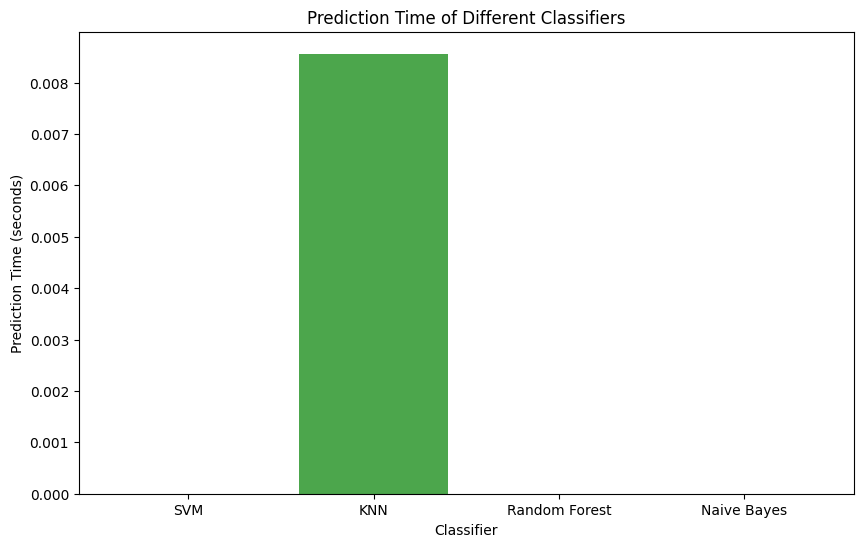

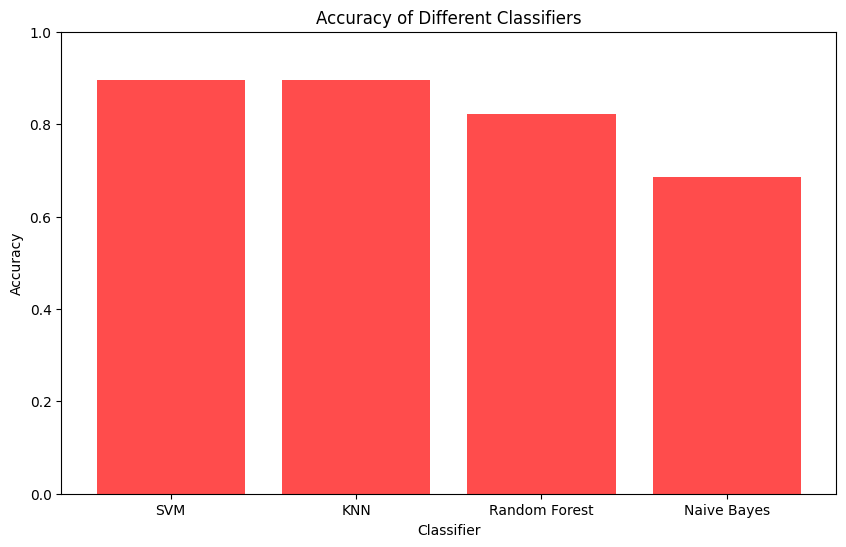

In [97]:
classifiers = ["SVM", "KNN", "Random Forest", "Naive Bayes"]
train_times = [svm_train_time, knn_train_time, rf_train_time, nb_train_time]
pred_times = [svm_pred_time, knn_pred_time, rf_pred_time, nb_pred_time]
accuracies = [svm_accuracy, knn_accuracy, rf_accuracy, nb_accuracy]


plt.figure(figsize=(10, 6))
plt.bar(classifiers, train_times, color='b', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Different Classifiers')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(classifiers, pred_times, color='g', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time of Different Classifiers')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='r', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)
plt.show()